# Assignment 6

## Try to submit as an HTML file

<font size = "5">
Print your Emory ID below

In [1]:
print(2484670)

2484670


<font size = "5">

Import the "pandas" and "matplotlib.pyplot" library

In [4]:
# Write your answer here:
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

(a) Compute function for each individual (map)

<font size = "3">

- Import the datset "data/bmi.csv"
    - **Note that the column `Height` is in $cm$, and `Weight` is in $kg$**
- Write a lambda function for $ BMI = \frac{weight (kg)}{height (m)^2} $
- Use ```list(map(...))``` to calculate $BMI$ for each row of the dataset
- Round the outcome into 2 decimal points
- Store the calculation in a new column in the dataframe called `BMI`
- Display the dataframe


In [42]:
# Write your own code here
bmi = pd.read_csv("data/bmi.csv")
bmi_func = lambda w, h : w / (h/100)**2


#list map calculations
bmi["BMI"] = list(map(bmi_func, bmi["Weight"], bmi["Height"]))
#round to two decimal places
bmi["BMI"] = bmi["BMI"].round(2)

#display
print(bmi)

     Gender  Height  Weight  Index    BMI
0      Male     174      96      4  31.71
1      Male     189      87      2  24.36
2    Female     185     110      4  32.14
3    Female     195     104      3  27.35
4      Male     149      61      3  27.48
..      ...     ...     ...    ...    ...
495  Female     150     153      5  68.00
496  Female     184     121      4  35.74
497  Female     141     136      5  68.41
498    Male     150      95      5  42.22
499    Male     173     131      5  43.77

[500 rows x 5 columns]


<font size = "5">
For questions (b)-(d), read "data/wdi_2020.csv" <br>

- This is a dataset containing the proportion  <br>
of urban population by country in 2020

<font size = "5">

(b) Convert to upper case

<font size = "3">

- Create the following function to convert a string to upper case

$\quad$ ``` fn_upper = lambda x: x.upper() ```

- Create a new column, "countryname_upper"  <br>
that converts "countryname" to upper case.

- Print the original `countryname` and the newly created column, like: <br>
"['Afghanistan', 'Africa Eastern and Southern', 'Africa Western and Central', 'Albania', 'Algeria', ......] "

In [31]:
# Write your own code here
wdi_2020 = pd.read_csv("data/wdi_2020.csv")
fn_upper = lambda x: x.upper()

#create column countryname_upper
wdi_2020["countryname_upper"] = wdi_2020["countryname"].apply(fn_upper)

#print original column: countryname
print(wdi_2020["countryname"])

#print new column: countryname_upper
print(wdi_2020["countryname_upper"])

0                      Afghanistan
1      Africa Eastern and Southern
2       Africa Western and Central
3                          Albania
4                          Algeria
                  ...             
261             West Bank and Gaza
262                          World
263                    Yemen, Rep.
264                         Zambia
265                       Zimbabwe
Name: countryname, Length: 266, dtype: object
0                      AFGHANISTAN
1      AFRICA EASTERN AND SOUTHERN
2       AFRICA WESTERN AND CENTRAL
3                          ALBANIA
4                          ALGERIA
                  ...             
261             WEST BANK AND GAZA
262                          WORLD
263                    YEMEN, REP.
264                         ZAMBIA
265                       ZIMBABWE
Name: countryname_upper, Length: 266, dtype: object


<font size = "5">

(c) Extract sorted elements from a dataset

<font size = "3">

- Sort by "prop_urbanpopulation" in ascending order
- Subset the 5 countries with the lowest urban population

In [54]:
# Write your code here
sorted_urb = wdi_2020.sort_values(by= "prop_urbanpopulation", ascending=True)

lowest_five = sorted_urb.iloc[:5]
display(lowest_five)

,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
191,2020,YR2020,Papua New Guinea,PNG,13.345,PAPUA NEW GUINEA
34,2020,YR2020,Burundi,BDI,13.708,BURUNDI
141,2020,YR2020,Liechtenstein,LIE,14.416,LIECHTENSTEIN
177,2020,YR2020,Niger,NER,16.626,NIGER
149,2020,YR2020,Malawi,MWI,17.427,MALAWI


<font size = "5">

(d) Subset elements with query

<font size = "3">

- Compute the 25 quantile value of "prop_urbanpopulation"
- Use ".query()" to subset countries with <br>
 "prop_urbanpopulation" higher the 25 quantile

**hint: Import ```numpy``` and use `np.nanpercentile`**

In [64]:
# Write your own code here
import numpy as np
quant = np.nanpercentile(wdi_2020["prop_urbanpopulation"], 25)

wdi_2020.query("prop_urbanpopulation > @quant")

,year,yearcode,countryname,countrycode,prop_urbanpopulation,countryname_upper
2,2020,YR2020,Africa Western and Central,AFW,47.857831,AFRICA WESTERN AND CENTRAL
3,2020,YR2020,Albania,ALB,62.112000,ALBANIA
4,2020,YR2020,Algeria,DZA,73.733000,ALGERIA
5,2020,YR2020,American Samoa,ASM,87.153000,AMERICAN SAMOA
6,2020,YR2020,Andorra,AND,87.916000,ANDORRA
...,...,...,...,...,...,...
258,2020,YR2020,"Venezuela, RB",VEN,88.279000,"VENEZUELA, RB"
260,2020,YR2020,Virgin Islands (U.S.),VIR,95.939000,VIRGIN ISLANDS (U.S.)
261,2020,YR2020,West Bank and Gaza,PSE,76.719000,WEST BANK AND GAZA
262,2020,YR2020,World,WLD,56.063764,WORLD


<font size = "5">

(e) Plot by category

<font size = "3">

- Read "data/wdi_urban.csv"<br>
This contains data from 1980 and 2020

- Create a list with the unique values of "year"
- Create a plot with a ...
    - Histogram of "prop_urbanpopulation" <br>
    for each year
    - Set the histogram option ``` alpha = 0.5 ``` for transparency
    - All the histograms should be overlapping
    - Create a legend with the list of years
    - Label the axes and the title

What do we learn from the graph?

HINT: See the example at the end of Lecture 10


     year yearcode            countryname countrycode  prop_urbanpopulation
0    1980   YR1980            Afghanistan         AFG                15.995
1    1980   YR1980                Albania         ALB                33.762
2    1980   YR1980                Algeria         DZA                43.542
3    1980   YR1980         American Samoa         ASM                74.330
4    1980   YR1980                Andorra         AND                92.064
..    ...      ...                    ...         ...                   ...
429  2020   YR2020  Virgin Islands (U.S.)         VIR                95.939
430  2020   YR2020     West Bank and Gaza         PSE                76.719
431  2020   YR2020            Yemen, Rep.         YEM                37.908
432  2020   YR2020                 Zambia         ZMB                44.629
433  2020   YR2020               Zimbabwe         ZWE                32.242

[434 rows x 5 columns]
[1980 2020]


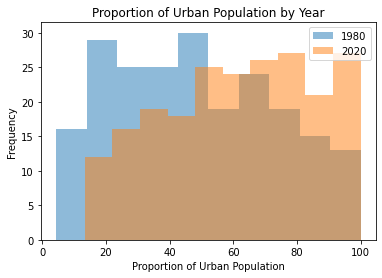

In [84]:
# Write your own code here
wdi_urban = pd.read_csv('data/wdi_urban.csv')
print(wdi_urban)

# Compute list of unique years
list_unique_year = pd.unique(wdi_urban["year"])
print(list_unique_year)

for year in list_unique_year:
    data_for_year = wdi_urban[wdi_urban["year"] == year]["prop_urbanpopulation"]
    plt.hist(data_for_year, alpha=0.5, label=str(year))

plt.xlabel("Proportion of Urban Population")
plt.ylabel("Frequency")
plt.title("Proportion of Urban Population by Year")
plt.legend()
plt.show()

#The year 2020 has a higher proportion of Urban Population than the year 2019